In [ ]:
# 1. Install necessary libraries
# We need transformers for the model, accelerate for efficient loading,
# and bitsandbytes for 4-bit quantization to save memory.
!pip install transformers accelerate bitsandbytes torch -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.6 MB/s eta 0:00:00


In [ ]:
# 2. Import Libraries
import torch # Import the PyTorch library for tensor operations and GPU acceleration
from transformers import AutoProcessor, LlavaForConditionalGeneration, BitsAndBytesConfig # Import necessary classes from the transformers library
from PIL import Image # Import the Image class from the Pillow library to work with images

# 3. Configure Model Loading (with 4-bit Quantization)
# We use BitsAndBytesConfig to configure the 4-bit quantization.
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # Enable 4-bit quantization
    bnb_4bit_quant_type="nf4", # Specify the quantization type (NormalFloat4)
    bnb_4bit_compute_dtype=torch.float16 # Set the compute data type for quantization to float16
)

# Specify the model ID from Hugging Face
model_id = "llava-hf/llava-1.5-7b-hf" # Define the model ID for the LLaVA 1.5 7B model

# 4. Load the Model and Processor
print("Loading model and processor...") # Print a message indicating the start of loading

# Load the processor (handles both text and image preprocessing)
# The AutoProcessor automatically loads the correct processor for the specified model.
processor = AutoProcessor.from_pretrained(model_id)

# Load the model with our 4-bit quantization configuration
# LlavaForConditionalGeneration is the model class for LLaVA.
model = LlavaForConditionalGeneration.from_pretrained(
    model_id, # Specify the model ID
    quantization_config=quantization_config, # Apply the quantization configuration
    device_map="auto" # Automatically maps model layers to available devices (GPU/CPU)
)

print("Model loaded successfully!") # Print a message indicating successful loading

Loading model and processor...


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Model loaded successfully!


Generating response...

QUERY


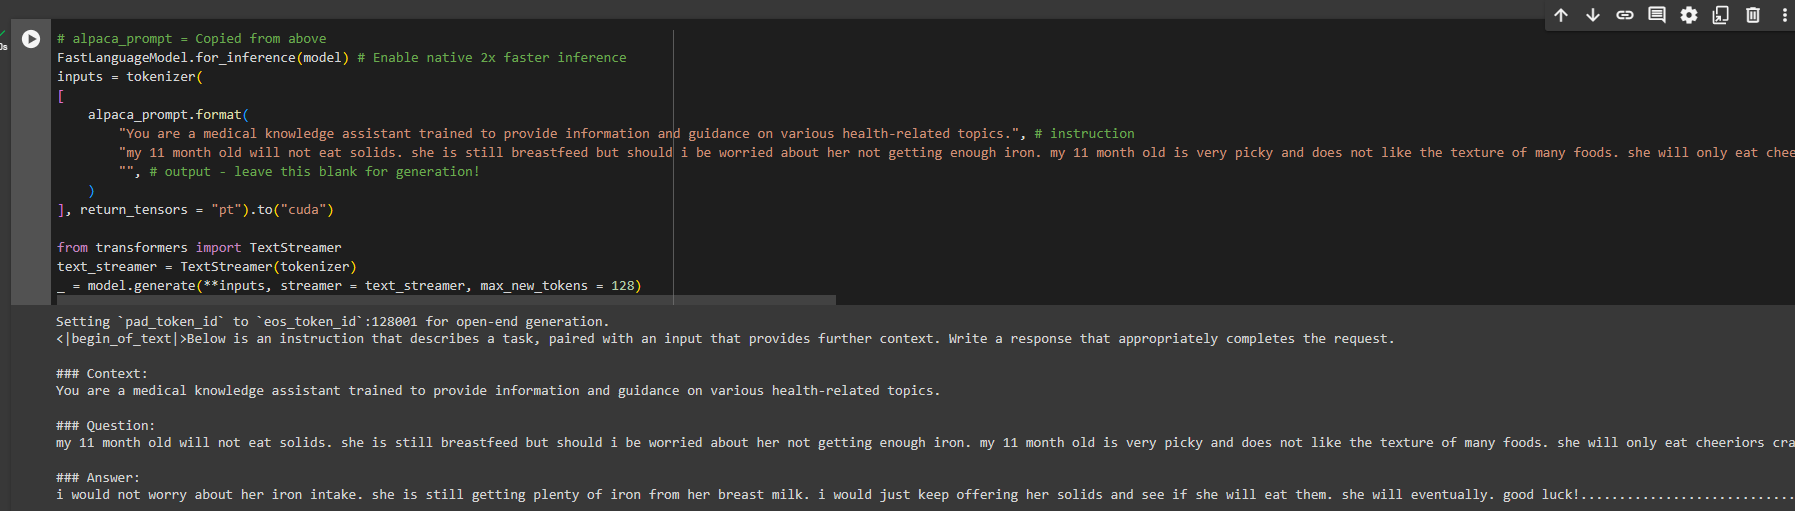


**Question:** What is in this image?

RESPONSE
The image displays a computer screen with a text-based program, possibly a chat or a script, written in a programming language. The program appears to be related to health-related topics, as indicated by the presence of health-related words. The text is displayed in a pink color, which adds a unique touch to the program.


In [ ]:
# 5. Prepare the Image and Prompt
def run_vqa(image_path, question):
    """
    This function takes an image file path and a question, and returns the model's answer.
    """
    # Open the local image file
    try:
        image = Image.open(image_path) # Attempt to open the image file from the given path
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}") # Handle the case where the file is not found
        return # Exit the function if the file is not found
    except Exception as e:
        print(f"Error opening image file: {e}") # Handle any other errors during file opening
        return # Exit the function if there's an error

    # LLaVA requires a specific prompt format.
    # The <image> token is a placeholder that the processor will replace
    # with the actual image embeddings.
    prompt = f"USER: <image>\n{question}\nASSISTANT:" # Format the prompt according to LLaVA's requirements

    # Process the inputs (image and text)
    # The processor prepares the image and text for the model.
    # return_tensors="pt" specifies that the output should be PyTorch tensors.
    # .to("cuda") moves the tensors to the GPU for faster processing.
    inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda")

    # Generate the response
    print("Generating response...") # Print a message indicating the start of generation
    # model.generate() generates the response based on the processed inputs.
    # max_new_tokens limits the length of the generated response.
    generate_ids = model.generate(**inputs, max_new_tokens=100)

    # Decode the generated tokens to text, skipping the prompt part
    # processor.batch_decode() converts the token IDs back to text.
    # skip_special_tokens=True removes special tokens like padding.
    # clean_up_tokenization_spaces=False prevents the removal of extra spaces.
    response_text = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

    # The output includes the prompt, so we need to clean it up
    # to get only the assistant's answer.
    # We split the text by "ASSISTANT:" and take the part after it.
    answer = response_text.split("ASSISTANT:")[-1].strip()

    # Display results
    print("\n" + "="*50) # Print a separator line
    print("QUERY") # Print a header for the query section
    print("="*50) # Print a separator line
    display(image) # Display the input image
    print(f"\n**Question:** {question}") # Print the question

    print("\n" + "="*50) # Print a separator line
    print("RESPONSE") # Print a header for the response section
    print("="*50) # Print a separator line
    print(answer) # Print the generated answer

# --- EXAMPLE USAGE ---
# You can change the image path and question below.
# Make sure to upload an image to your Colab environment and provide the correct path.
sample_image_path = "/content/fine tune results.png" # Replace with the path to your image file
sample_question = "What is in this image?" # Replace with your question about the image

run_vqa(sample_image_path, sample_question) # Call the run_vqa function with the sample image and question
